<a href="https://colab.research.google.com/github/reevutrprog/TRPROG/blob/master/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 08 ##

How does intelligence and education impact the level of income?

In order to estimate a regression, import the statsmodels module (https://www.statsmodels.org):

`
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()
`
* y may be a series with data corresponding to the target (or dependent variable)
* X may be a dataframe with data corresponding to the features (or independent variable)

Note: Information related to IQ level is not validated. Data were obtained from the Internet. On the other hand, IQ is culturally biased, and values correspond to average

dataFile='https://github.com/masterfloss/data/blob/main/exerciseInt.xlsx?raw=true'

1. Read data and analyse it.

2. Create a regression, where y is the Income, and all the others are features of the model.

3. Analise output

4. Create another repression, where y is the Income. IQ and 'Education expenditure per capita' are features of the model.

5. Analyse relationship between Income and each one of the features using skatter plot.


In [12]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

file1 = r'https://github.com/masterfloss/data/blob/main/exerciseInt.xlsx?raw=true'
df = pd.read_excel(file1)
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
df.dropna(inplace=True)
df



,country,IQ,Education expenditures per capita,quality of Life,BMI female,BMI male,Income
0,Afghanistan,80,13.0,35.0,22.6,24.0,340.0
1,Albania,84,55.0,55.0,27.0,26.4,1690.0
2,Algeria,82,109.0,52.0,24.7,26.5,2325.0
3,Argentina,90,278.0,59.0,27.9,27.6,6345.0
4,Australia,99,1388.0,79.0,27.7,26.8,25665.0
...,...,...,...,...,...,...,...
104,United Kingdom,100,1443.0,65.0,27.4,27.1,30986.0
105,United States,98,1909.0,72.0,29.0,29.0,36470.0
106,Uruguay,93,154.0,66.0,27.3,27.4,5854.0
107,Venezuela,85,241.0,32.0,26.7,26.9,4812.0


In [ ]:
#model1
X = df[['IQ','Education expenditures per capita','quality of Life','BMI female','BMI male']]
Y = df['Income']

model = sm.OLS(Y,X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:                 Income   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              180.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    1.29e-46
Time:                        07:20:49   Log-Likelihood:                         -999.35
No. Observations:                  99   AIC:                                      2009.
Df Residuals:                      94   BIC:                                      2022.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [10]:
#model2
X1 = df[['IQ','Education expenditures per capita']]
Y = df['Income']

model1 = sm.OLS(Y,X1).fit()
predictions1 = model1.predict(X1) 
print_model1 = model1.summary()
print(print_model1)

                                 OLS Regression Results                                
Dep. Variable:                 Income   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              404.3
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    8.90e-48
Time:                        07:28:28   Log-Likelihood:                         -1005.7
No. Observations:                  99   AIC:                                      2015.
Df Residuals:                      97   BIC:                                      2021.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

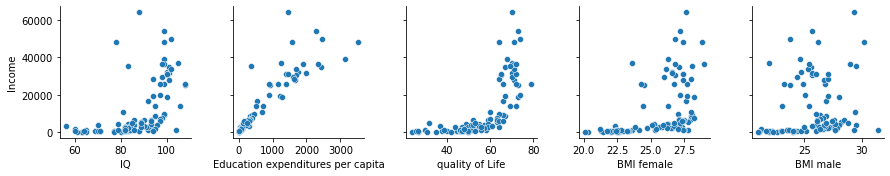

In [14]:
#scatter plot
x_vars = ['IQ','Education expenditures per capita','quality of Life','BMI female','BMI male']
y_vars = ['Income']
g = sns.PairGrid(df,x_vars=x_vars, y_vars=y_vars)
g.map(sns.scatterplot)